In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_dist1d, plot_current_profile
from distgen.physical_constants import unit_registry
from matplotlib import pyplot as plt
import yaml

In [3]:
import os

In [4]:
gen = Generator(verbose=0) 
units = {'x':'mm', 'y':'mm', 'z':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'pC', 'I':'A'}

# Radial Distributions
----------------------

# Radial Uniform

The radial uniform distribution is given by

$\rho_r(r)=\frac{2}{r_R^2-r_L^2}$ for $0 \leq r_L < r < r_R$ and zero otherewise.

Typical usage is shown below for a uniformly filled beam as well as a ring:


YAML input:
r_dist:
  max_r:
    units: mm
    value: 2
  min_r:
    units: mm
    value: 0
  type: radial_uniform



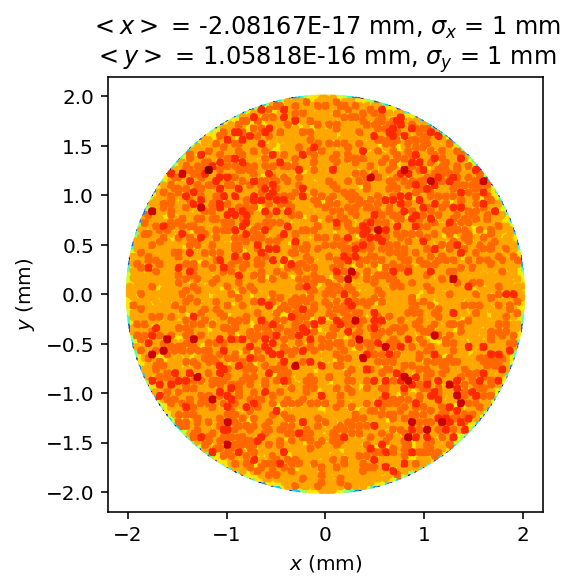

In [5]:
gen=Generator('data/rad.uniform.in.yaml',verbose=0)
gen.input['r_dist']['min_r']['value']=0

print('\nYAML input:')

print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);


YAML input:
r_dist:
  max_r:
    units: mm
    value: 2
  min_r:
    units: mm
    value: 1
  type: radial_uniform



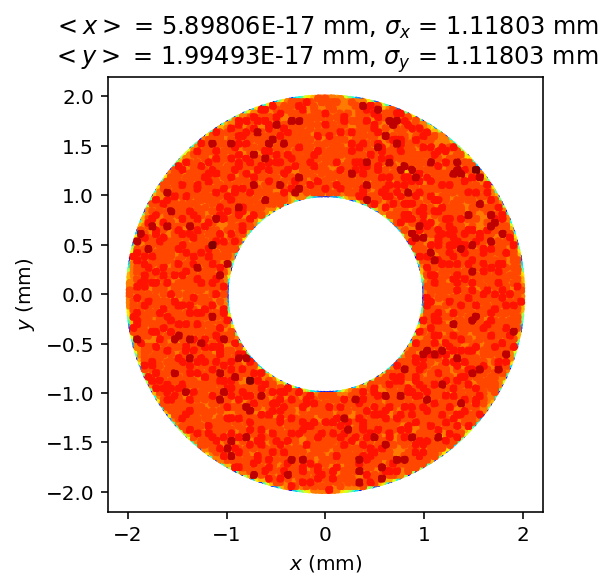

In [6]:
gen=Generator('data/rad.uniform.in.yaml',verbose=0)

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial Gaussian (with Truncation)

The radial normal distribution including truncation(s) has a probability function given by

$\rho_r(r) = \frac{1}{\sigma^2}\frac{\phi(r/\sigma)}{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)} $ for $0 \leq r_L \leq r \leq r_R$ and zero everywhere else.

In this expresion $\phi(\xi) = \frac{1}{2\pi}\exp\left(-\xi^2/2\right)$ is the canonical raidial normal distirbution (no truncation), and the scale parameter $\sigma$ follows from the product of two normal distributions in $x$ and $y$ when $\sigma=\sigma_x=\sigma_y$.  The corresponding CDF is given by

$P(r)= \frac{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r}{\sigma}\right)}{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)} $ for $0 \leq r_L \leq r$.

The corresponding first and second moments are:

$\langle r\rangle = \frac{\frac{r_L}{\sigma}\phi\left(\frac{r_L}{\sigma}\right)
-\frac{r_R}{\sigma}\phi\left(\frac{r_R}{\sigma}\right)
+\frac{1}{2\sqrt{2\pi}}\left( \text{erf}\left(\frac{r_R}{\sigma\sqrt{2}}\right) - \text{erf}\left(\frac{r_L}{\sigma\sqrt{2}}\right) \right) 
}
{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)}$,

$r_{rms} = \sqrt{ 2\sigma^2 + r_L^2 - \frac{(r_R^2-r_L^2)\phi(r_R/\sigma)}{\phi\left(\frac{r_L}{\sigma}\right)-\phi\left(\frac{r_R}{\sigma}\right)} }$.

Note that in the limits $r_L\rightarrow 0$ and $r_R -> \infty$ the above expressions reduce to the underlying radial normal distribution:

$\rho_r(r)\rightarrow \frac{\phi\left(\frac{r}{\sigma}\right)}{\sigma^2}$, $P(r)\rightarrow 1 - \phi\left(\frac{r}{\sigma}\right)$, $\langle r\rangle\rightarrow \sqrt{\frac{\pi}{2}}\sigma$, and $r_{rms}\rightarrow \sqrt{2}\sigma$.  This limiting case is shown first below.



Here three examples are provided: a non-truncated Gaussian with $\sigma_{x,y}$ = 2 mm, followed by a truncated Gaussian using a truncation fraction to specify the maximal radial cut, followed by a truncated Gaussian using n_sigma_cutoff to specify the radial cut.

Example 1: canonical Gaussian with $\sigma_{x,y}$ = 2mm


YAML input:
r_dist:
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



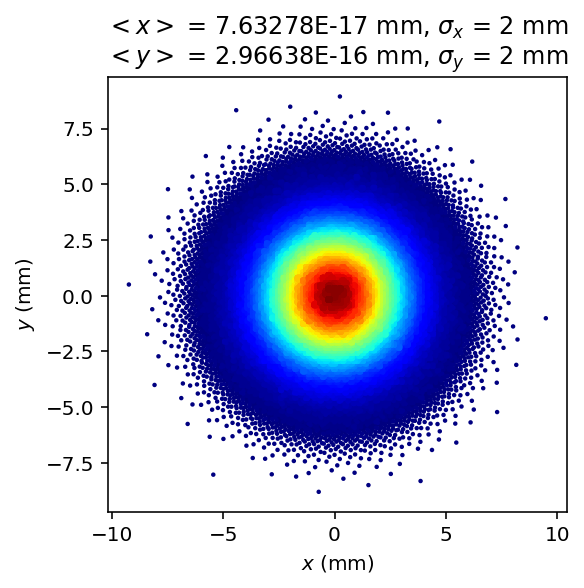

In [7]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 2: Truncated Gaussian with a pinhole radius of 1 mm, clipped at 50% intensity


YAML input:
r_dist:
  truncation_fraction:
    units: dimensionless
    value: 0.5
  truncation_radius:
    units: mm
    value: 1
  type: rg



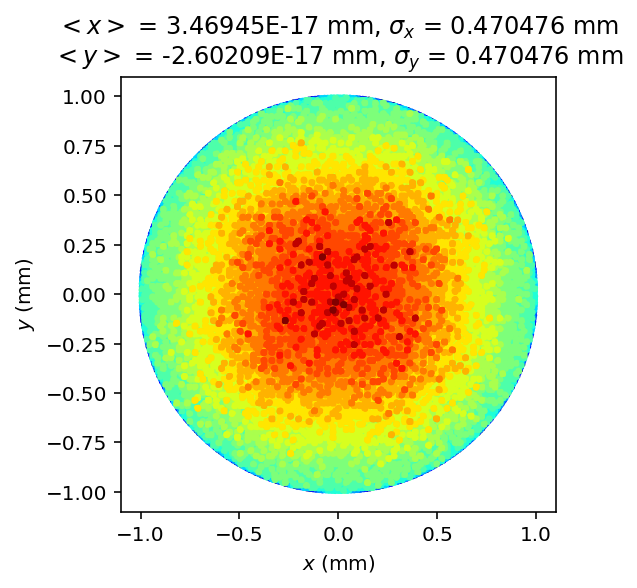

In [8]:
# Truncated radial gaussian distribution with pihole diameter of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.yaml',verbose=0)

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(gen.beam(), 'x', units['x'], 'y',units['y'], axis='equal', title_on=True);

Example 3: truncated Gaussian using underlying $\sigma_{x,y}$ = 2 mm and n_sigma_cutoff = 1


YAML input:
r_dist:
  n_sigma_cutoff: 1
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



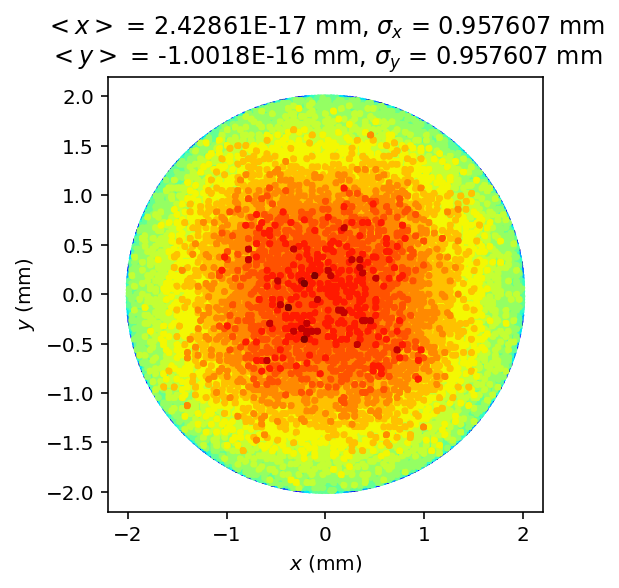

In [9]:
# Radial gaussian distribution with cut using n_sigma_cutoff
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
gen.input['r_dist']['n_sigma_cutoff'] = 1

print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial File


YAML input:
r_dist:
  file: /Users/colwyngulliford/GitHub/distgen/examples/data/cutgauss.rad.txt
  type: radfile
  units: mm



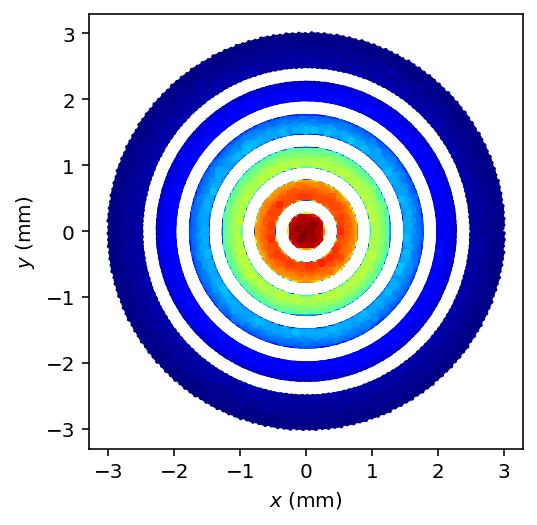

In [10]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.yaml', verbose=0)

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal');

# Radial Tukey


YAML Input:
r_dist:
  length:
    units: mm
    value: 5
  ratio:
    units: ''
    value: 0.25
  type: radial_tukey



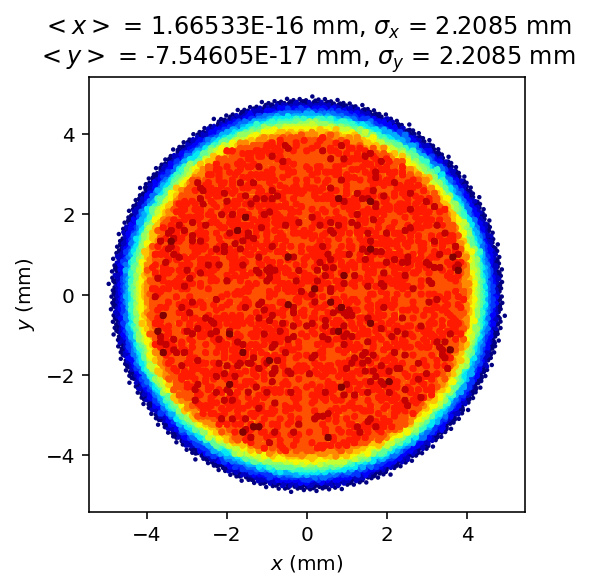

In [11]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml',verbose=0)

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial Super Gaussian

This implements a radial version of the Super Gaussian function.  Here the radial function takes the form:

$2\pi\rho(r;\lambda,p) = \frac{1}{\Gamma\left(1+\frac{1}{p}\right)\lambda^2} \exp\left[-\left(\frac{r^2}{2\lambda^2}\right)^p\right]$. 

The first and (rms) second moment of the distribution are given by:

$\langle r\rangle = \frac{2\sqrt{2}}{3}\frac{\Gamma\left(1+\frac{3}{2p}\right)}{\Gamma\left(1+\frac{1}{p}\right)}\lambda$, 

$r_{\text{rms}} = \sqrt{\frac{\Gamma\left(1+\frac{2}{p}\right)}{\Gamma\left(1+\frac{1}{p}\right)}}\lambda$.


Example 1: hyper-Gaussian (uniform) limit (power $\rightarrow\infty$): $\sigma_{x,y}$ = 1 mm


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 0
  sigma_xy:
    units: mm
    value: 1
  type: rsg



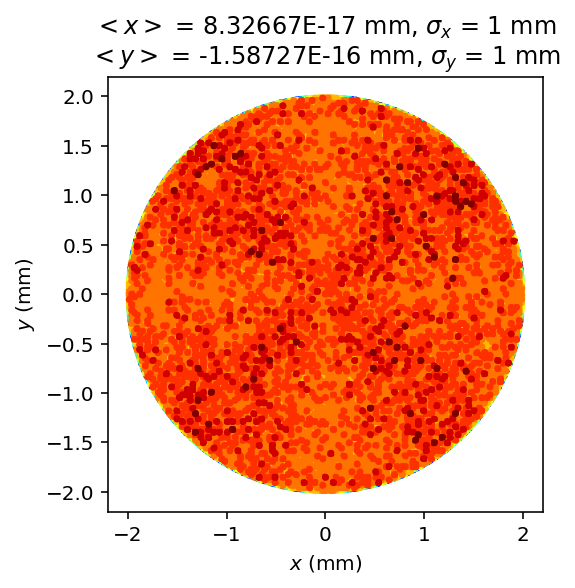

In [12]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 2: Gaussian limit (power = 1): $\sigma_{x,y}$ = 1 mm


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 1.0
  sigma_xy:
    units: mm
    value: 1
  type: rsg



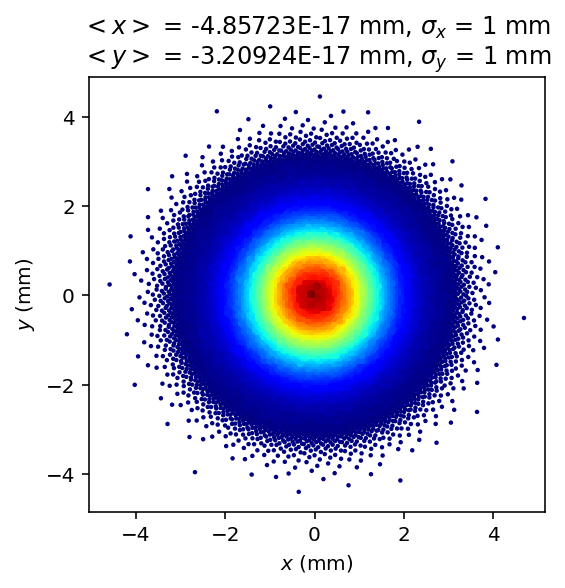

In [13]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
gen['r_dist:alpha:value']=1.0

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 3: sub-Gaussian (power < 1): $\sigma_{x,y} = 1$ mm, $p$ = 0.5 


YAML Input:
r_dist:
  p:
    units: ''
    value: 0.5
  sigma_xy:
    units: mm
    value: 1
  type: rsg



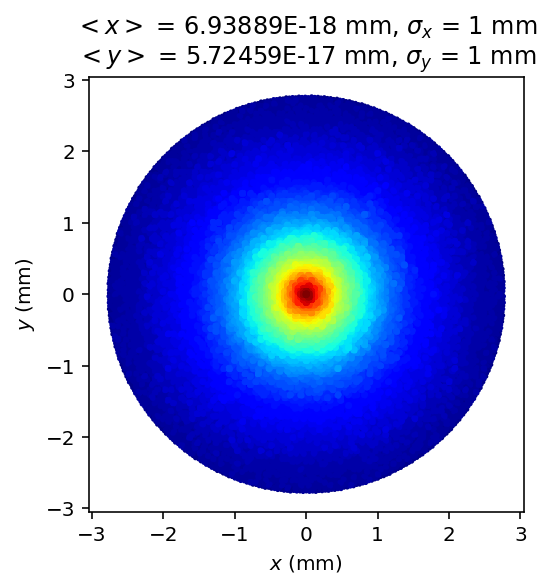

In [14]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
del gen.input['r_dist']['alpha']
gen.input['r_dist']['p'] = {'value':0.5,'units':''}

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis="equal", title_on=True);

# Radial Deformable


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 0.1
  sigma_xy:
    units: mm
    value: 1
  slope_fraction:
    units: ''
    value: -1
  type: dr



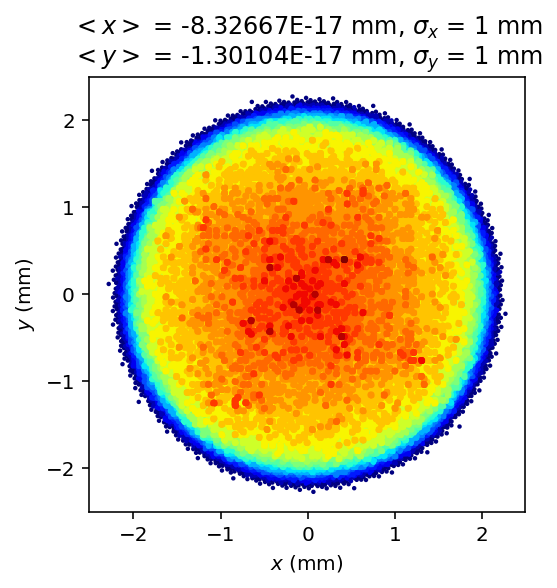

In [15]:
gen=Generator('data/deformable.in.yaml',verbose=0)

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], axis="equal", title_on=True);

# Radial Interpolation

In [16]:
gen=Generator('data/interp_ex.yaml',verbose=0)
print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))
PG = gen.run()


YAML Input:
r_dist:
  Pr:
    pt01: 0.0
    pt02: 1.1
    pt03: 3.2
    pt04: 8.0
    pt05: 9.0
    pt06: 8.0
    pt07: 12.0
    pt08: 3.0
    pt09: 2.0
    pt10: 3.0
    pt11: 5.0
    pt12: 1.0
  method: spline
  type: radial_interpolation



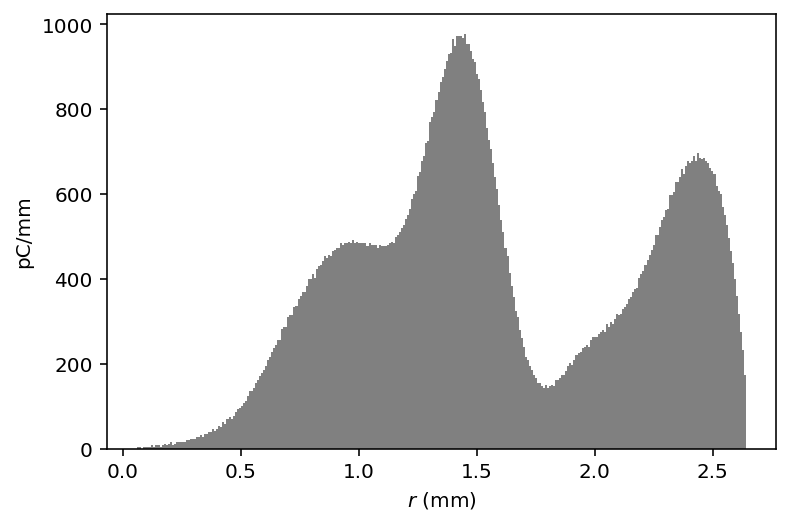

In [17]:
PG.plot('r')

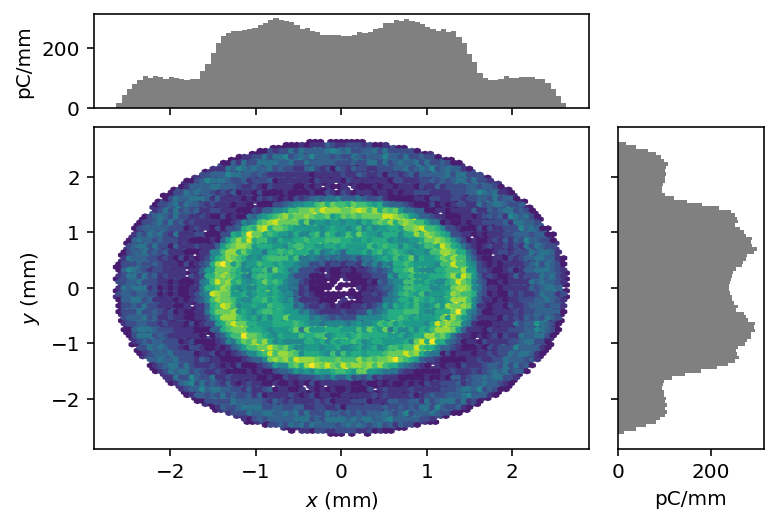

In [18]:
PG.plot('x', 'y')

In [19]:
PG['sigma_x'], PG['sigma_y']

(0.0012, 0.0012)

In [20]:
from distgen.tools import SUPPORTED_IMAGE_EXTENSIONS

# 2D Distributions
------------------

# 2D File
The user can load images for use in generating particles.  Supported file formats include: 

In [21]:
SUPPORTED_IMAGE_EXTENSIONS

['.png', '.tiff', '.jpeg', '.jpg', '.dicom', '.dcm']

The example below uses `.jpeg`.


YAML input:
xy_dist:
  file: /Users/colwyngulliford/GitHub/distgen/examples/data/seaturtle.jpeg
  max_x:
    units: mm
    value: 1
  max_y:
    units: mm
    value: 1
  min_x:
    units: mm
    value: -1
  min_y:
    units: mm
    value: -1
  threshold: 0.0
  type: file2d



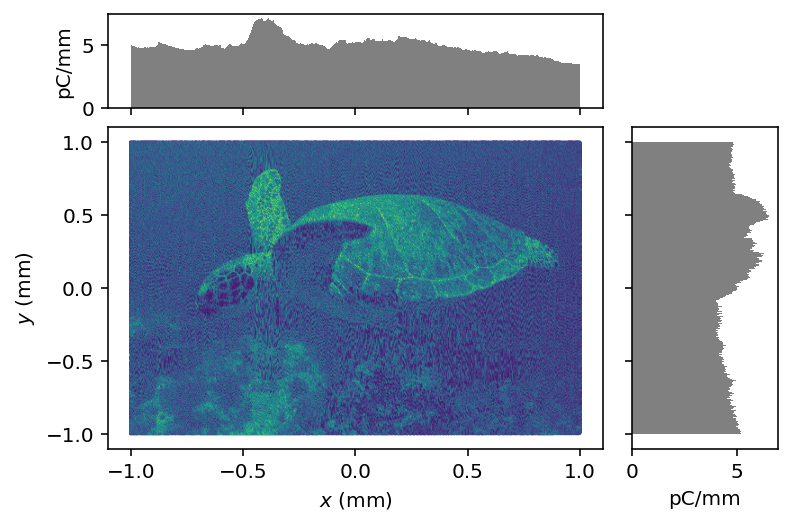

In [22]:
gen=Generator('data/jpeg.image.in.yaml',verbose=0)
gen.run()

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

gen.particles.plot('x','y')


YAML input:
xy_dist:
  file: /Users/colwyngulliford/GitHub/distgen/examples/data/image-00319.dcm
  max_x:
    units: mm
    value: 1
  max_y:
    units: mm
    value: 1
  min_x:
    units: mm
    value: -1
  min_y:
    units: mm
    value: -1
  threshold: 0.0
  type: file2d



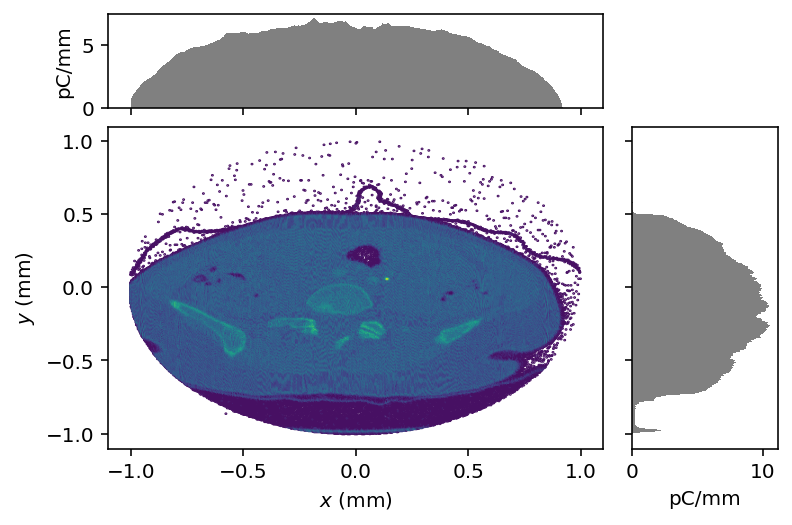

In [23]:
gen=Generator('data/dcm.image.in.yaml',verbose=0)
gen.run()

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

gen.particles.plot('x','y')

In addition to handling these standard images, distgen also supports the legacy ascii format from the original version of the code.  The example below makes use of this legacy format:


YAML input:
xy_dist:
  file: /Users/colwyngulliford/GitHub/distgen/examples/data/laser.image.txt
  type: file2d



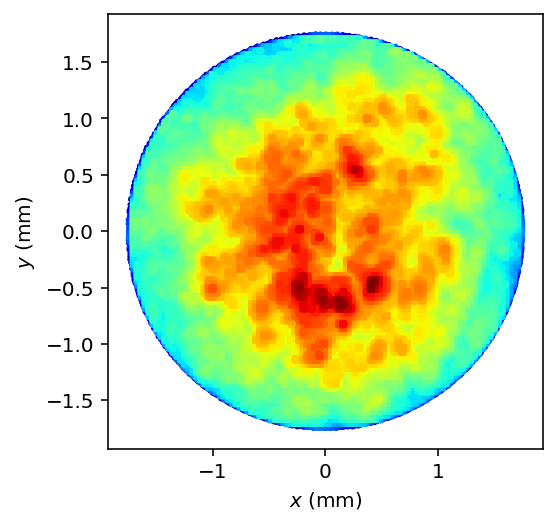

In [25]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles 
gen=Generator('data/laser.image.in.yaml',verbose=0)

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

# X-Y Plot
plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

# 2D Image

If the user has an image dataset already loaded into python, they can directly pass this to Distgen using the Image2d class.  An example of how to use this in practice is given below:

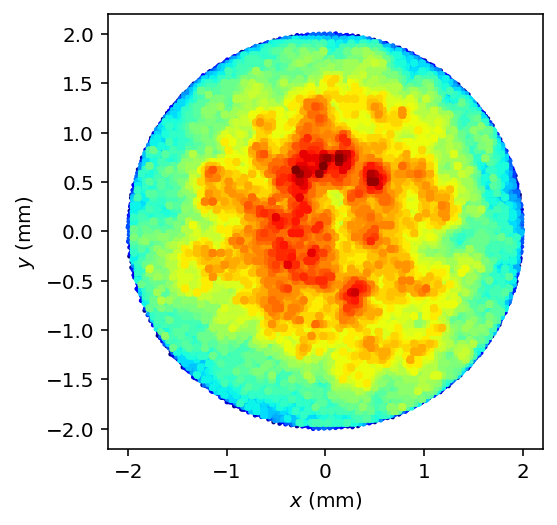

In [26]:
from distgen.tools import read_2d_file

xs, ys, Pxy, xstr, ystr = read_2d_file('data/laser.image.txt')
inputs={
    
    'n_particle': 200000,
    'total_charge': {'value':1, 'units':'pC'},
    'random_type': 'hammersley',
    'start': {
        'MTE':{'units': 'meV', 'value': 150}, 
        'type': 'cathode'
    },
    'xy_dist':{
        'type' : 'image2d',
        'min_x': {'value':-2.0, 'units':'mm'},
        'max_x': {'value':+2.0, 'units':'mm'},
        'min_y': {'value':-2.0, 'units':'mm'},
        'max_y': {'value':+2.0, 'units':'mm'},
        'P':Pxy
    }
}

gen=Generator(inputs, verbose=0)
plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

Note that this allows the user to manipulate the 2d distribution and length scales:

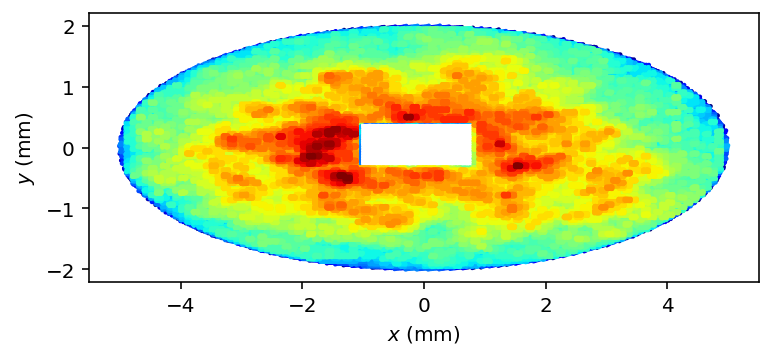

In [27]:
gen=Generator(inputs, verbose=0)

P2 = Pxy.magnitude
P2 = P2.transpose()

# Cut out a rectangle in the center
P2[236-50:225+50, 236-50:225+50] = 0  

gen['xy_dist:P']=P2
gen['xy_dist:min_x:value'], gen['xy_dist:max_x:value']= -5000, +5000
gen['xy_dist:min_x:units'], gen['xy_dist:max_x:units']= 'um', 'um'
gen['xy_dist:min_y:units'], gen['xy_dist:max_y:units']= 'mm', 'mm'

plot_dist2d(gen.beam(), 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

# Product 2D
It is possible to multiply two or more 2d or radial distributions.  This is useful for creating particles from a laser and folding in a cathod QE map.  The example shows a truncated Gaussian laser profile combined with a simple checker board QE map:


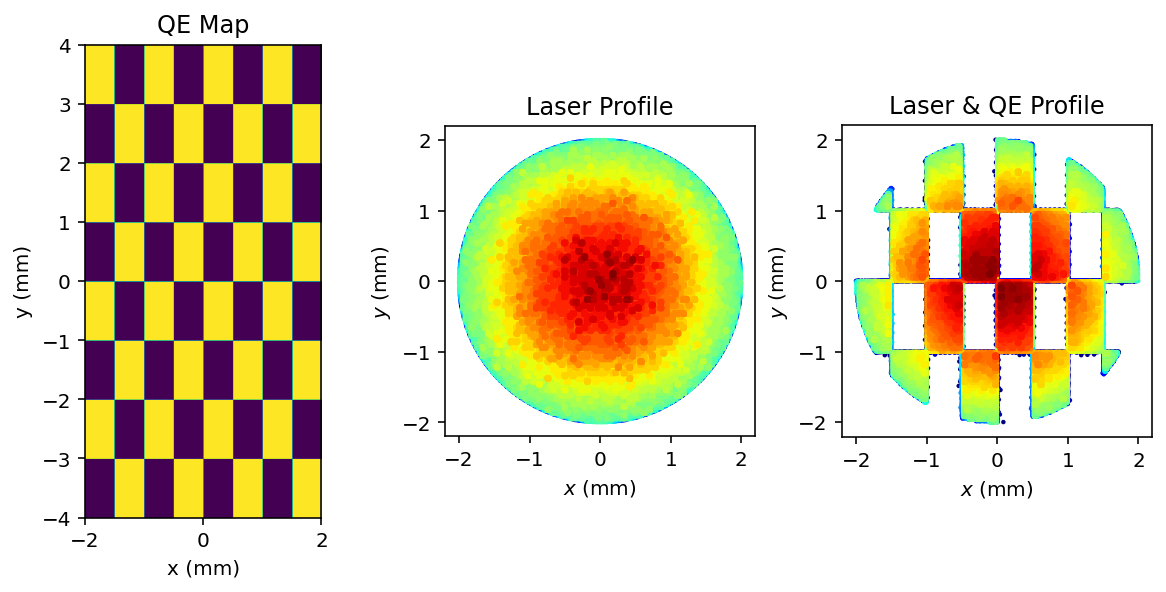

In [28]:
import numpy as np
from matplotlib import pyplot as plt

mask = np.kron([[1, 0] * 4, [0, 1] * 4] * 4, np.ones((50, 50)));

ys = np.linspace(-4, +4, mask.shape[0])
xs = np.linspace(-2, +2, mask.shape[1])

fig, ax = plt.subplots(1,3, constrained_layout=True, figsize=(8,4))

ax[0].imshow(mask, extent=[xs.min(),xs.max(), ys.min(), ys.max()]);
ax[0].set_aspect('equal',  adjustable='box')
ax[0].set_title('QE Map');
ax[0].set_xlabel('x (mm)');
ax[0].set_ylabel('y (mm)');

laser_inputs={
    
    'n_particle': 200000,
    'total_charge': {'value':1, 'units':'pC'},
    'random_type': 'hammersley',
    'start': {
        'MTE':{'units': 'meV', 'value': 150}, 
        'type': 'cathode'},
    
    'r_dist': {
        'type': 'rg',
        'truncation_fraction': {'units': 'dimensionless', 'value': 0.5},
        'truncation_radius': {'units': 'mm', 'value': 2}
    },
        
}

gen = Generator(laser_inputs)
beam1 = gen.beam()

qe_and_laser_inputs={
    
    'n_particle': 200000,
    'total_charge': {'value':1, 'units':'pC'},
    'random_type': 'hammersley',
    'start': {
        'MTE':{'units': 'meV', 'value': 150}, 
        'type': 'cathode'},
    
    'xy_dist':{
        'type': 'product',
        'dists': {
            
            'QE': {
                'type': 'image2d',
                'x':{'value':xs, 'units':'mm'},
                'y':{'value':ys, 'units':'mm'},
                'P':mask
            
            },
            
            'Laser':{
                'type': 'rg',
                'truncation_fraction': {'units': 'dimensionless', 'value': 0.5},
                'truncation_radius': {'units': 'mm', 'value': 2}},
        }
    }
}

gen = Generator(qe_and_laser_inputs)
beam2 = gen.beam()

plot_dist2d(beam1, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal', ax=ax[1]);
ax[1].set_title('Laser Profile');

plot_dist2d(beam2, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal', ax=ax[2]);
ax[2].set_title('Laser & QE Profile');

# 1D Distributions
-----------

# Uniform
The uniform distirbuition is defined by a probability distribution function:

$\rho(x) = \frac{1}{b-a}$ for $a\leq x\leq b$ and zero elsewhere.  

The corresponding CDF is

$P(x) = \frac{x-a}{b-a}$ for $a\leq x\leq b$ and zero elsewhere.

The first and second moments of this distribution are:

$\langle x \rangle = \frac{1}{2}(a+b)$ and $\sigma_x = \frac{b-a}{\sqrt{12}}$.

It is possible to set a uniform distribution using the `min_{var}` and `max_{var}` input variables:


YAML Input:
x_dist:
  max_x:
    units: mm
    value: 2
  min_x:
    units: mm
    value: -1
  type: uniform



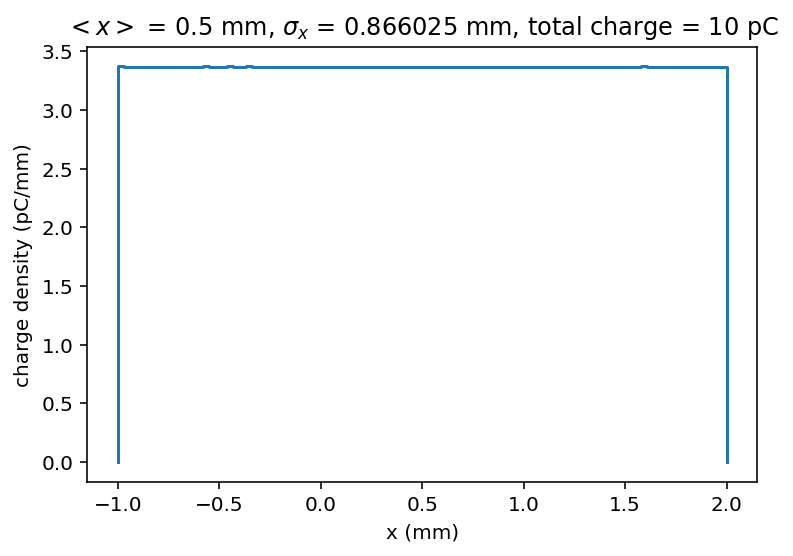

In [29]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)

print('\nYAML Input:')
print(yaml.dump({'x_dist':gen.input['x_dist']}))

plot_dist1d(gen.beam(), 'x', units['y'], nbins=100, title_on=True)

The user may also specify the distribution using the `sigma_{var}` and `avg_{var}` input params:


YAML Input:
t_dist:
  avg_t:
    units: ps
    value: 2.0
  sigma_t:
    units: ps
    value: 0.2886751345948129
  type: uniform



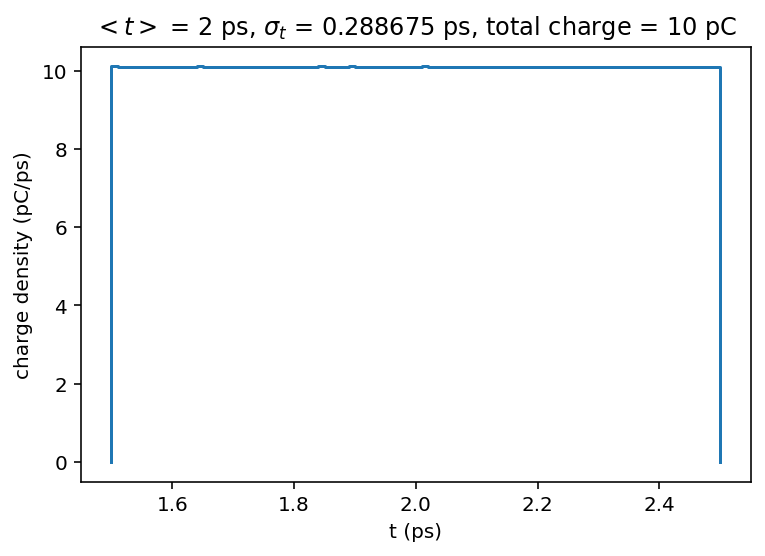

In [30]:
import numpy as np
gen['t_dist']={
    'type': 'uniform',
    'sigma_t':{
        'value': float(1/np.sqrt(12)),
        'units':'ps'
    },
    'avg_t':{
        'value':2.0,
        'units':'ps'
    }
}

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_dist1d(gen.beam(), 't', units['t'], nbins=100, title_on=True)

# Linear
The linear distirbuition is defined by a probability distribution function:

$\rho(x) = \frac{p_b-p_a}{b-a}(x-a) + p_a$ for $a\leq x\leq b$ and zero elsewhere.  

The corresponding CDF is

$P(x) = \frac{1}{2}\frac{p_b-p_a}{b-a}(x-a)$ for $a\leq x\leq b$ and zero elsewhere.

It is possible to set a uniform distribution using the `min_{var}` and `max_{var}`(equivalent to $a$ and $b$ above) input variables as well as the `slope_fraction` $\in[-1,1]$.  

# 1D File
Disgten supports importing a 1D PDF saved in column form in.  The input form of the file should have space separated headers such as $x$ and $Px$, with corresponding column data below it.  The PDF is normalized numerically using the numpy.trapz numerical integration routine. The CDF is computed using the scipy.cumtrapz cumulative numerical intgration routine.

The following example shows a gaussian PDF with cuts added to it.


YAML Input:
y_dist:
  file: /Users/colwyngulliford/GitHub/distgen/examples/data/cutgauss.1d.txt
  type: file1d
  units: mm



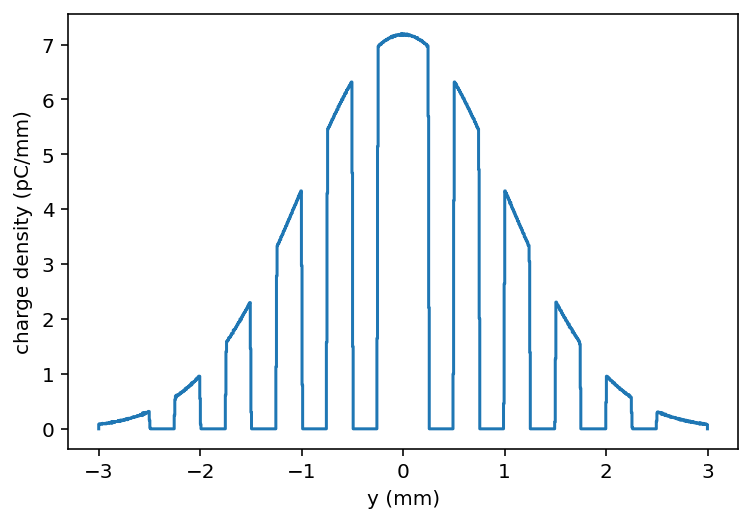

In [31]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)

print('\nYAML Input:')
print(yaml.dump({'y_dist':gen.input['y_dist']}))
plot_dist1d(gen.beam(), 'y', units['y'], nbins=1000)

# Gaussian (with Truncation)

If not specified, the Gaussian is truncated at $\mu\pm5\sigma$:


YAML Input:
t_dist:
  avg_t:
    units: ps
    value: -0.5
  sigma_t:
    units: ps
    value: 1
  type: gaussian



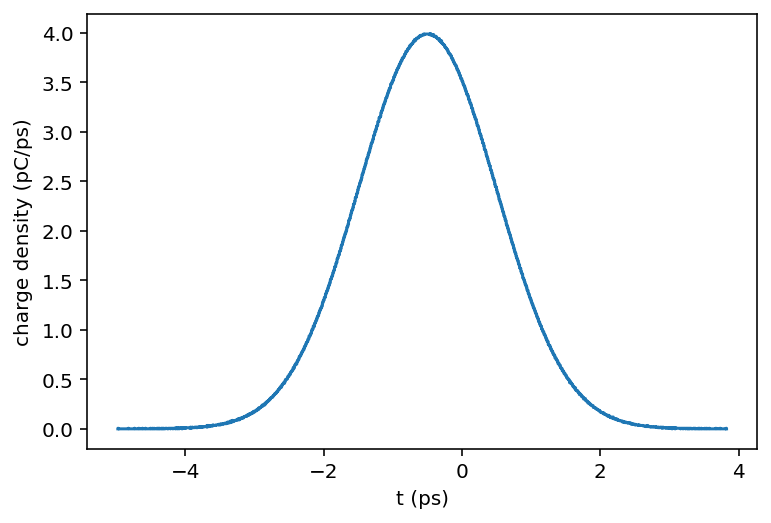

In [32]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_dist1d(gen.beam(), 't', units['t'], nbins=1000)

The user can specify `n_sigma_cutoff` to symmetrically truncate at $
\mu\pm N_{\sigma~\text{cutoff}}\times\sigma$:


YAML Input:
t_dist:
  avg_t:
    units: ps
    value: 1
  n_sigma_cutoff: 2
  sigma_t:
    units: ps
    value: 1
  type: gaussian



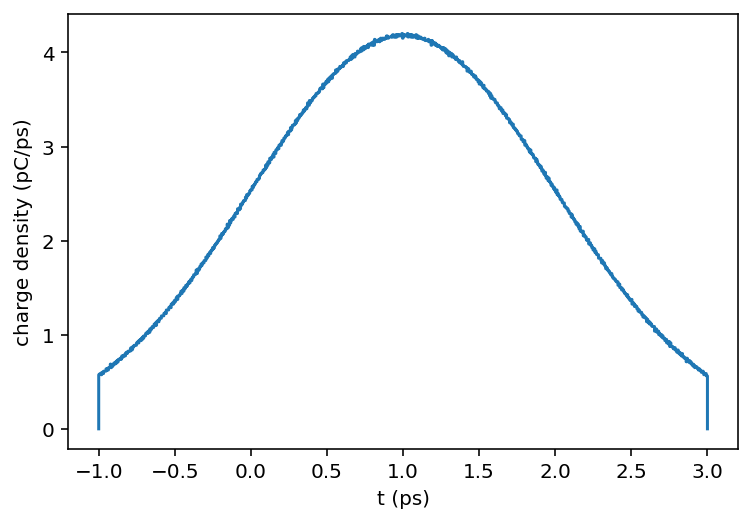

In [33]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
gen['t_dist']['n_sigma_cutoff'], gen['t_dist']['avg_t']['value'] = 2, 1

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_dist1d(gen.beam(), 't', units['t'], nbins=1000)

# Super Gaussian
In additional to the regular Gaussian function, it is also possible to sample a super-Gaussian distribution defined by

$\rho(x; \lambda, p) = \frac{1}{2\sqrt{2}\Gamma\left(1+\frac{1}{2p}\right)\lambda } \exp\left[-\left(\frac{(x-\mu)^2 }{2\lambda^2}\right)^{p}\right]$

Here $\lambda$ is the length scale and $p$ is the power of the super-Gaussian. Note when $p=1$ this expression reduces to a Normal distirbution, in which case $\sigma_x=\lambda$.  As $p\rightarrow\infty$ the distribution reduces to a flat-top (uniform). The full range of powers is given by $p\in\left(0,\infty\right]$.  

The first and second moments of the distribution are given by:

$\langle x\rangle = \mu$, and $\sigma_x = \left(\frac{2\Gamma\left(1+\frac{3}{2p}\right)}{3\Gamma\left(1+\frac{1}{2p}\right)}\right)^{1/2}\lambda$.


Often, it is convenient to scan the distribution from the uniform limit to the Gaussian limit.  To do some, the input $p$ can be parameterized by $\alpha\in[0,1]$ where $p = 1/\alpha$.  Here $\alpha=0$ corresponds to a flat-top (uniform) and $\alpha=1$ corresponds to a Gaussian.  Examples of both types of usage are shown below.\

Example 1: specifying $\alpha = 1/p \in[0,1]$:


YAML Input:
t_dist:
  alpha:
    units: ''
    value: 0.5
  sigma_t:
    units: ps
    value: 8.0
  type: sg



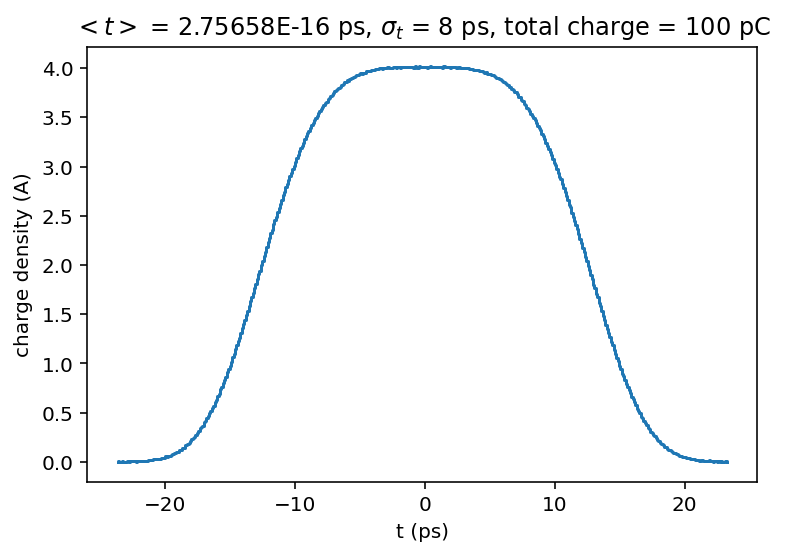

In [34]:
# Super Gaussian distribution
gen=Generator('data/SG.beer.can.in.yaml', verbose=0)

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(gen.beam(), units['t'], units['I'], title_on=True)

# Tukey 


YAML Input:
t_dist:
  length:
    units: ps
    value: 5.0
  ratio:
    units: ''
    value: 0.75
  type: tukey



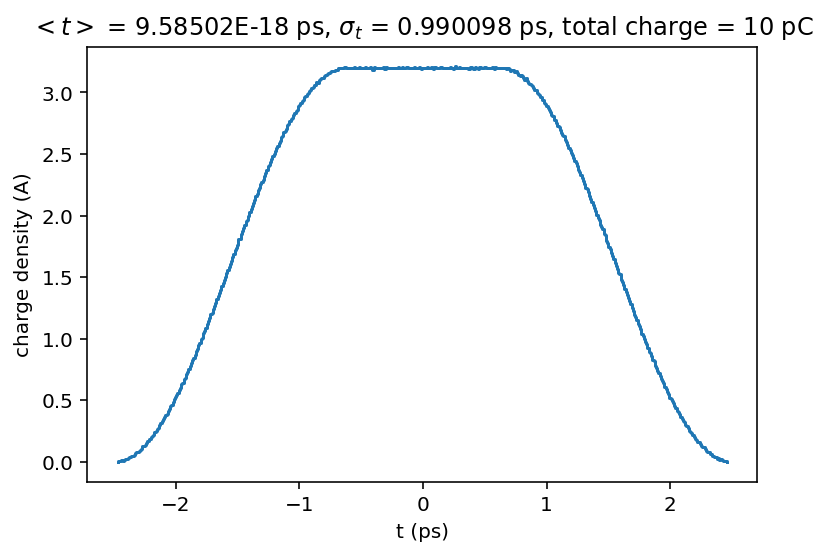

In [35]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml', verbose=0)

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(gen.beam(), units['t'], units['I'], nbins=500, title_on=True)

# Superposition 1D

This distribution allows the user to superimpose an arbitrary number of 1D PDFs.  The general form is:

$\rho(x) = \sum_i w_i \frac{\rho_i(x)}{\max(\rho_i)}$.

Here the $w_i$ are user specified weights.  If no weight is specified for a given $\rho_i$, then the weight(s) will default to one.

Example 1: equal weighting


YAML Input:
z_dist:
  dists:
    d1:
      avg_z:
        units: mm
        value: -2
      sigma_z:
        units: mm
        value: 1.0
      type: gaussian
    d2:
      avg_z:
        units: mm
        value: 2
      sigma_z:
        units: mm
        value: 1.0
      type: gaussian
  type: superposition
  weights:
    d1: 1
    d2: 1

{'d1': 1, 'd2': 1}


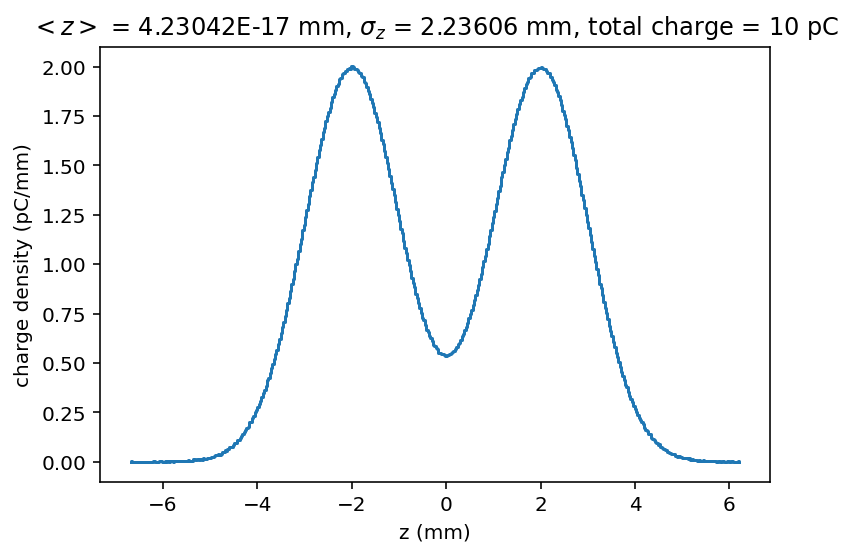

In [36]:
gen=Generator('data/multi.gaussian.in.yaml', verbose=0)
print('\nYAML Input:')
print(yaml.dump({'z_dist':gen.input['z_dist']}))
plot_dist1d(gen.beam(), 'z', units['z'] ,title_on=True)
print(gen['z_dist:weights'])

Example 2: with user specified weighting:


YAML Input:
z_dist:
  dists:
    d1:
      avg_z:
        units: mm
        value: -2
      sigma_z:
        units: mm
        value: 1.0
      type: gaussian
    d2:
      avg_z:
        units: mm
        value: 2
      sigma_z:
        units: mm
        value: 1.0
      type: gaussian
  type: superposition
  weights:
    d1: 2
    d2: 1



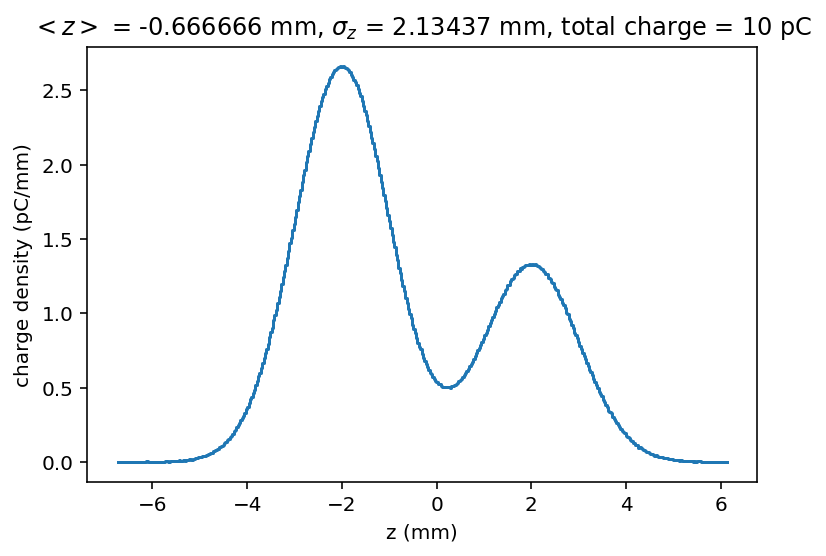

In [37]:
gen['z_dist:weights']={'d1':2, 'd2':1}
print('\nYAML Input:')
print(yaml.dump({'z_dist':gen.input['z_dist']}))
plot_dist1d(gen.beam(), 'z', units['z'] ,title_on=True)

# Product 1D


YAML Input:
z_dist:
  dists:
    d1:
      max_z:
        units: mm
        value: 3.0
      min_z:
        units: mm
        value: -3.0
      type: uniform
    d2:
      avg_z:
        units: mm
        value: 0
      sigma_z:
        units: mm
        value: 2.0
      type: gaussian
  type: product



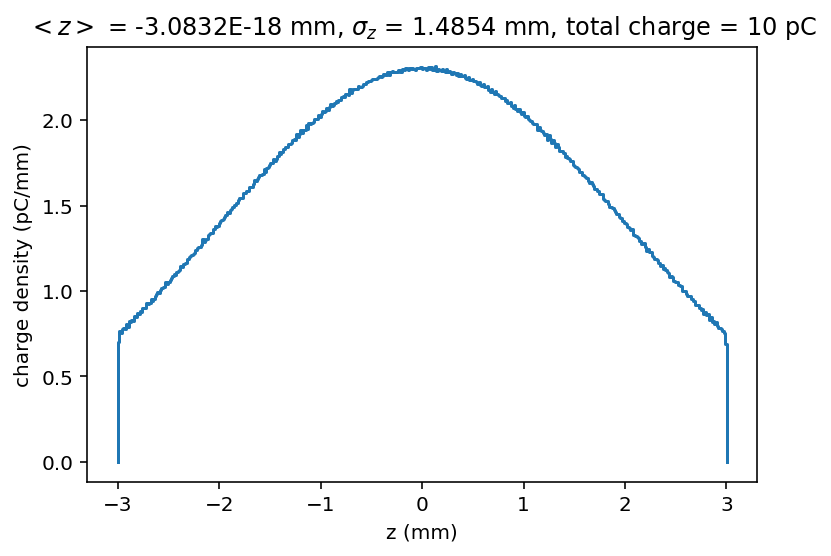

In [38]:
gen=Generator('data/product.gaussian.in.yaml', verbose=0)
print('\nYAML Input:')
print(yaml.dump({'z_dist':gen.input['z_dist']}))
plot_dist1d(gen.beam(), 'z', units['z'] ,title_on=True)

# Deformable


YAML Input:
t_dist:
  alpha:
    units: ''
    value: 0.25
  avg_t:
    units: ps
    value: 0.0
  sigma_t:
    units: ps
    value: 1
  slope_fraction:
    units: ''
    value: 1
  type: deformable



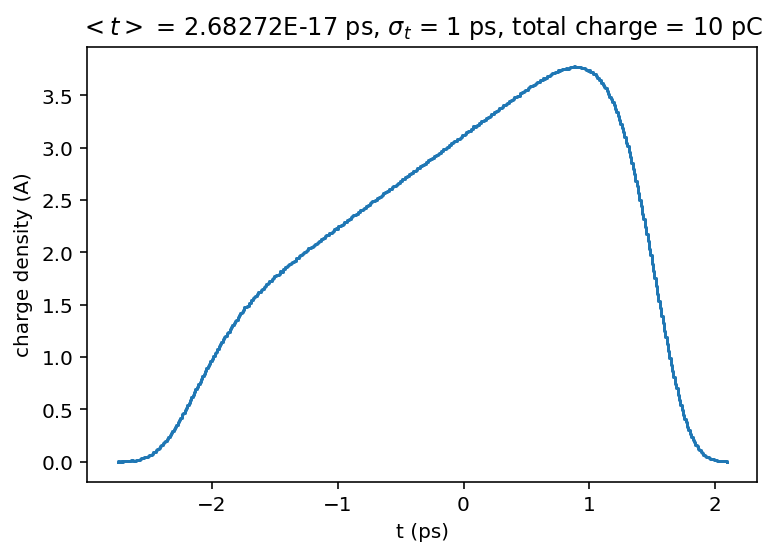

In [39]:
gen=Generator('data/deformable.in.yaml', verbose=0)
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))
plot_current_profile(gen.beam(), units['t'], units['I'] ,title_on=True)

# Interpolation

For the 1d interpolation distribution the user provides N points of the PDF for the desired variable and interpolation is employed to make a smooth curve.  The PDF knots can be passed in as a dictionary or as an array.  Passing in a corresponding coordinate vector is optional.  If a coordinate vector is not input, then the user must use a transform operator to scale the resulting distribution (shown below).

In [40]:
gen = Generator('data/interp_ex.yaml')
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))


YAML Input:
t_dist:
  Pt:
    pt01: 0.1
    pt02: 0.3
    pt03: 4.0
    pt04: 2.9
    pt05: 8.5
    pt06: 2.0
    pt07: 0.1
    pt08: 1.0
    pt09: 5.0
    pt10: 10.0
    pt11: 6.0
    pt12: 1.0
  avg_t:
    units: ns
    value: 0.0
  method: spline
  sigma_t:
    units: ns
    value: 0.08287285705
  type: interp



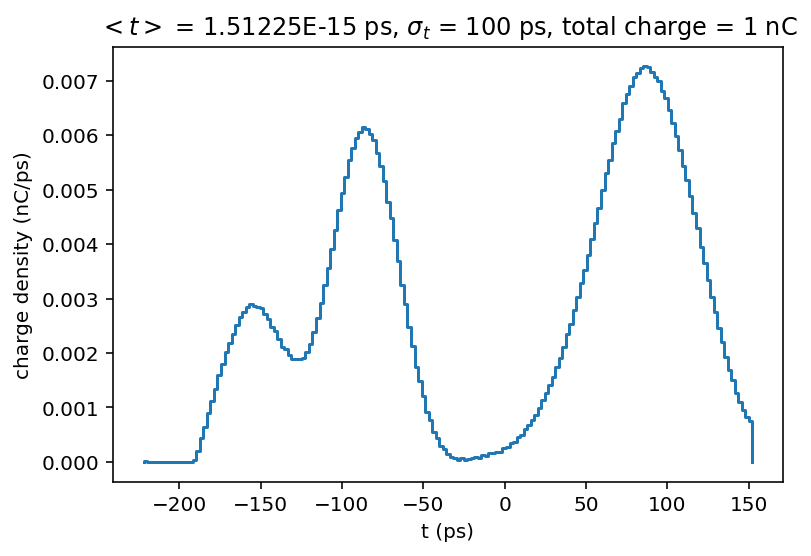

In [41]:
ax = plot_dist1d(gen.beam(), 't', units['t'] ,title_on=True)

# Special Temporal Distributions
-------

# Pulse stacking temporal crystals


YAML Input:
t_dist:
  crystal_angle_1:
    units: deg
    value: 0.6
  crystal_angle_2:
    units: deg
    value: 1.8
  crystal_angle_3:
    units: deg
    value: -0.9
  crystal_angle_4:
    units: deg
    value: -0.5
  crystal_length_1:
    units: mm
    value: 15.096
  crystal_length_2:
    units: mm
    value: 7.548
  crystal_length_3:
    units: mm
    value: 3.774
  crystal_length_4:
    units: mm
    value: 1.887
  type: crystals



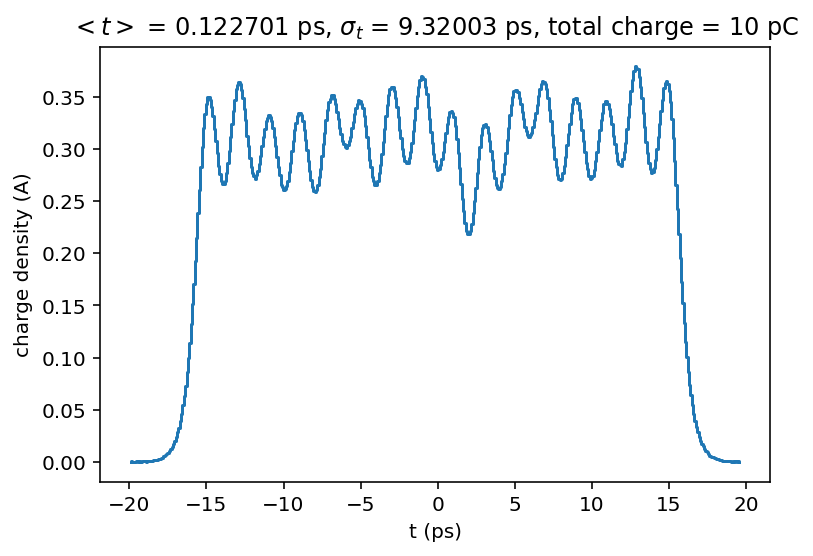

In [42]:
gen=Generator('data/t.crystals.in.yaml',verbose=0)
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))
plot_current_profile(gen.beam(), units['t'], units['I'] ,title_on=True)